# Theory Questions

Q1. What is overfitting and how to avoid it ?

Overfitting refers to a model that models the training data too well. This will cause an issue if the training data contains imperfections. This can be avoided by several methods :
- Cross Validation
- Train with more data
- Remove irrelevant input features
- Regularization
- Ensembling

<br><br>

Q2. What is RMSE and MSE ? How can you calculate them ?

<b>MSE (Mean Squared Error)</b> represents the difference between the original and predicted values which are extracted by squaring the average difference over the data set. It is a measure of how close a fitted line is to actual data points. The lesser the Mean Squared Error, the closer the fit is to the data set. The MSE has the units squared of whatever is plotted on the vertical axis. <br>

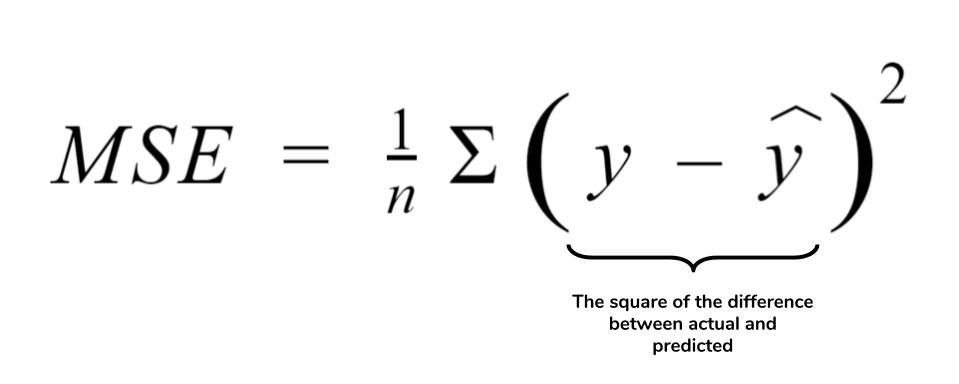 

<br>

<b>RMSE (Root Mean Squared Error)</b> is the error rate by the square root of MSE. RMSE is the most easily interpreted statistic, as it has the same units as the quantity plotted on the vertical axis or Y-axis. RMSE can be directly interpreted in terms of measurement units, and hence it is a better measure of fit than a correlation coefficient. <br>

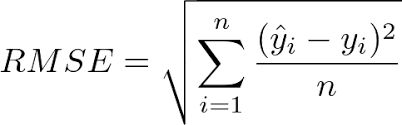

<br><br>

Q3. What is Line of best fit ?

*Line of best fit* refers to a line through a scatter plot of data points that best expresses the relationship between those points.

<br><br>

Q4. Explain multivariate linear regression using a real-life example

- relationship between temperature, pricing and number of workers to the revenue.
- House Price Dataset. Using Multiple predictor variables to find the price of the house.

<br><br>

Q5. How can we improve the accuracy of a linear regression model ?

- Feature Encoding : Encode Categorical variables to interpretable numeric data.
- Feature Selection and Scaling : Find dependent variables from the dataset.
- Feature Engineering : Manupulating some features to improve the accuracy.
- Hyperparameter Tuning : tweeking model parameters to get better accuracy.

<br><br>

# Simple Linear Regression with Python

Implement the <b>Simple Linear Regression</b> algorithm over the dataset given below

[Download Salary-Age Dataset](https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/salary_d)

[Reference-Notebook](https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/salary_d)

## Importing Necessary Packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Dataset

In [2]:
df = pd.read_csv('data/salary_data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.info

<bound method DataFrame.info of     YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872>

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


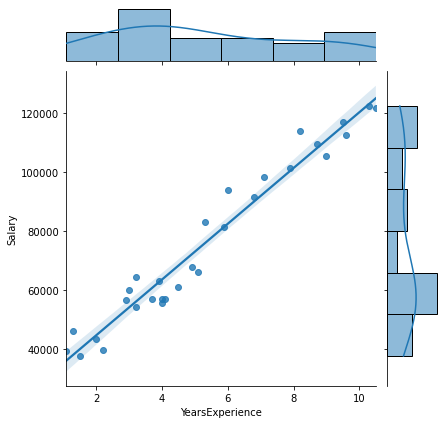

In [6]:
sns.jointplot(x = df['YearsExperience'], y = df['Salary'], data=df, kind='reg')

Observations:
- No Outliers or Missing Data
- 1 predictor variable (YearsExperience) and 1 response variable (Salary).
- Data is small. Shape of Data is (30, 2)

Creating Input and Output variables

In [7]:
X = df[['YearsExperience']]
y = df['Salary']

## Simple LR without splitting the data

In [8]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
prediction1 = model.predict(X)
prediction1

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [10]:
y.values

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [11]:
r2_score(y, prediction1)

0.9569566641435086

Without splitting the data, we got a R-squared value of 0.95.

## Simple LR with train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
X_train.shape

(24, 1)

In [14]:
X_test.shape

(6, 1)

In [15]:
model_split = LinearRegression()
model_split.fit(X_train, y_train)

LinearRegression()

In [16]:
prediction2 = model_split.predict(X_test)
prediction2

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

In [17]:
y_test.values

array([83088, 98273, 63218, 93940, 61111, 91738], dtype=int64)

In [18]:
r2_score(y_test, prediction2)

0.7616681465472094

With splitting data, we got a R-squared value of 0.76. This should be because of less data.(30 was splitted to 24 and 6). This could be solved by collecting more data.

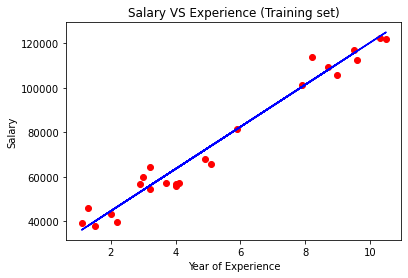

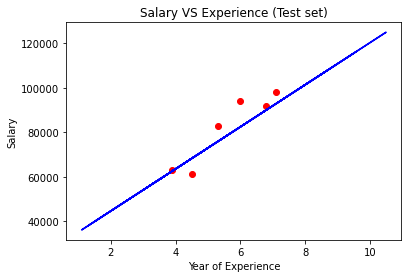

In [19]:
# Visualizing the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary VS Experience (Training set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()
plt.clf()

# Visualizing the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary VS Experience (Test set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

Predicting Salary for YearsExperience = 5

In [20]:
model.predict([[5]])  # Without Splitting Data

array([73042.01180594])

In [21]:
model_split.predict([[5]]) # With train_test_split

array([72274.62168832])